In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Repo root (three levels up from analysis/visualization/)
ROOT = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f"ROOT: {ROOT}")

%matplotlib inline

# ── Load CSV ──────────────────────────────────────────────────────────
csv_path = os.path.join(ROOT, "analysis/outputs/track_tool_tip_sam3/tracked_tip.csv")
df = pd.read_csv(csv_path)
print(f"Loaded {len(df)} rows from {csv_path}")
df.head()

ROOT: /home/navlab/sukeerth/Tree/TreeHacks/treehacks-2026
Loaded 462 rows from /home/navlab/sukeerth/Tree/TreeHacks/treehacks-2026/analysis/outputs/track_tool_tip_sam3/tracked_tip.csv


,frame_idx,x,y
0,0,740.000000,470.000000
1,1,740.000000,470.000000
2,2,1705.575073,930.219299
3,3,1705.575073,930.219299
4,4,1705.576904,930.106506


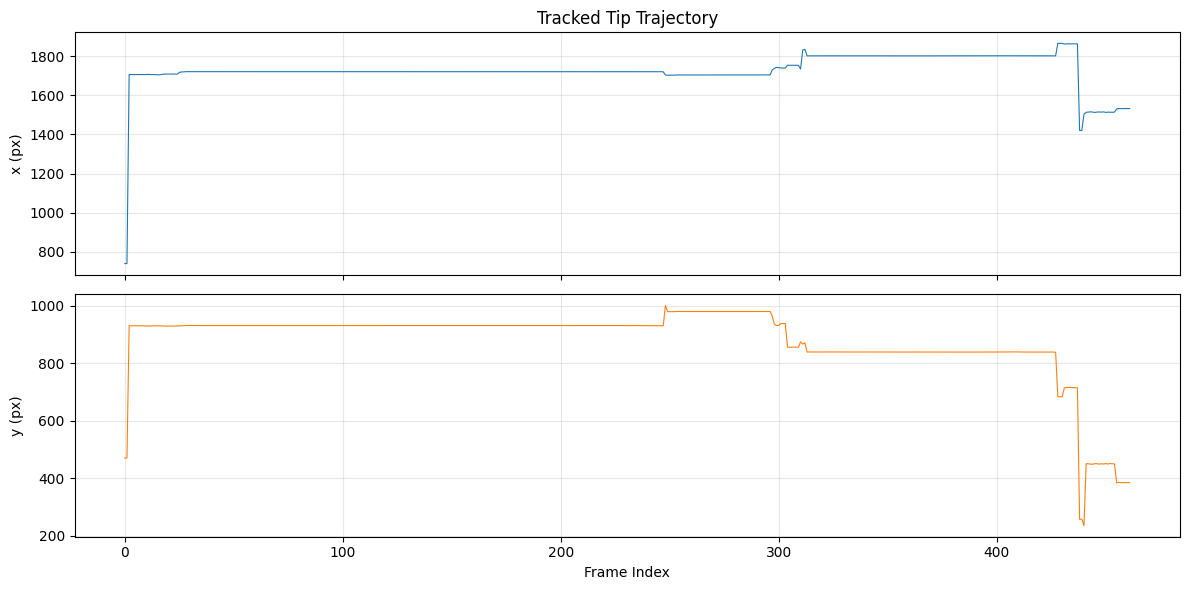

In [2]:
# ── X and Y trajectories over time ────────────────────────────────────
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

ax1.plot(df["frame_idx"], df["x"], linewidth=0.8)
ax1.set_ylabel("x (px)")
ax1.set_title("Tracked Tip Trajectory")
ax1.grid(True, alpha=0.3)

ax2.plot(df["frame_idx"], df["y"], linewidth=0.8, color="tab:orange")
ax2.set_ylabel("y (px)")
ax2.set_xlabel("Frame Index")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

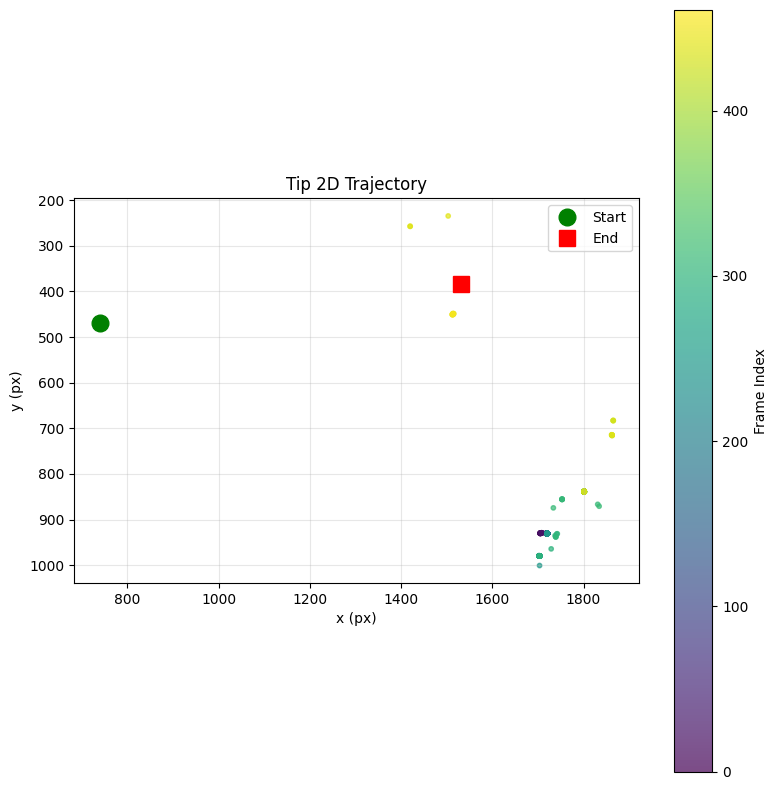

In [3]:
# ── 2D trajectory (x vs y) ────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(8, 8))

scatter = ax.scatter(df["x"], df["y"], c=df["frame_idx"], cmap="viridis",
                     s=10, alpha=0.7)
ax.plot(df["x"].iloc[0], df["y"].iloc[0], "go", markersize=12, label="Start")
ax.plot(df["x"].iloc[-1], df["y"].iloc[-1], "rs", markersize=12, label="End")

ax.set_xlabel("x (px)")
ax.set_ylabel("y (px)")
ax.set_title("Tip 2D Trajectory")
ax.invert_yaxis()  # image coords: y increases downward
ax.legend()
ax.set_aspect("equal")
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Frame Index")

plt.tight_layout()
plt.show()